1. Load various data

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
tips = Table.read_table('tips.csv')
tips

total_bill,tip,sex,smoker,day,time,size
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.5,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4
8.77,2,Male,No,Sun,Dinner,2
26.88,3.12,Male,No,Sun,Dinner,4
15.04,1.96,Male,No,Sun,Dinner,2
14.78,3.23,Male,No,Sun,Dinner,2


a. Create a histogram that overlays the mean tips of men with the mean tips of women.

C:\Users\C20Andrew.Jekel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


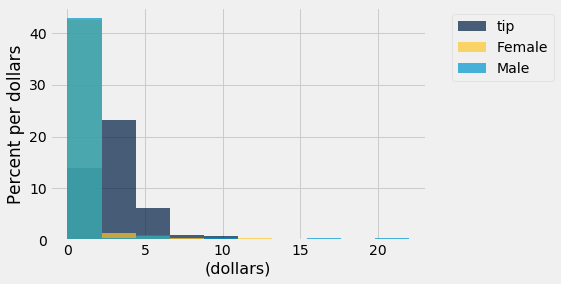

In [14]:
tips_by_sex = tips.pivot('sex', 'tip')
tips_by_sex.hist(unit='dollars')

b. Now create one that breaks down tips by time.

C:\Users\C20Andrew.Jekel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


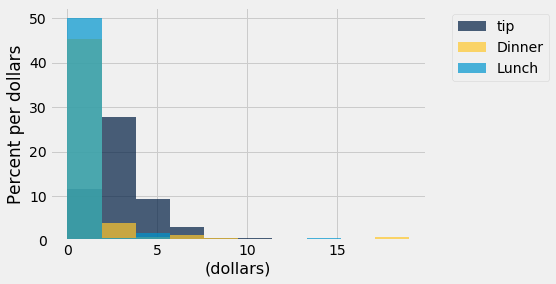

In [11]:
tips_by_time = tips.pivot('time', 'tip')
tips_by_time.hist(unit='dollars')

2. Create a Weekday function.

In [51]:
def weekday_to_num(d):
    """
    This takes a weekday and converts it to an int corresponding to the day.
    """
    if d == 'Mon':
        return 1
    if d == 'Tues':
        return 2
    if d == 'Wed':
        return 3
    if d == 'Thurs':
        return 4
    if d == 'Fri':
        return 5
    if d == 'Sat':
        return 6
    if d == 'Sun':
        return 7

3. Now apply the newly birthed function to the 'tips' table.

In [52]:
weekday_num = tips.apply(weekday_to_num, 'day')
tips = tips.with_column('weekday_num', weekday_num)
tips

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


4. Create est_tip function.

In [53]:
def est_tip(bill, window=1):
    """
    This function will take only the total bills whose values fall in the desired window and...
    average all the tips given at the total bill values in that range.
    """
    tips_with_window = tips.where('total_bill', are.between(bill-window, bill+window))
    return np.average(tips_with_window.column('tip'))

5. Apply the new funciton to the tips table and make a new column of results.

In [54]:
tip_estimates = tips.with_column("Tip Prediction", tips.apply(lambda x: est_tip(x,2), 'total_bill'))
tip_estimates

total_bill,tip,sex,smoker,day,time,size,weekday_num,Tip Prediction
16.99,1.01,Female,No,Sun,Dinner,2,7,2.767
10.34,1.66,Male,No,Sun,Dinner,3,7,1.86486
21.01,3.5,Male,No,Sun,Dinner,3,7,3.21486
23.68,3.31,Male,No,Sun,Dinner,2,7,3.67333
24.59,3.61,Female,No,Sun,Dinner,4,7,3.6272
25.29,4.71,Male,No,Sun,Dinner,4,7,3.63154
8.77,2,Male,No,Sun,Dinner,2,7,1.86857
26.88,3.12,Male,No,Sun,Dinner,4,7,3.76474
15.04,1.96,Male,No,Sun,Dinner,2,7,2.54036
14.78,3.23,Male,No,Sun,Dinner,2,7,2.46036


5. part 2. Make a scatter plot of the result.

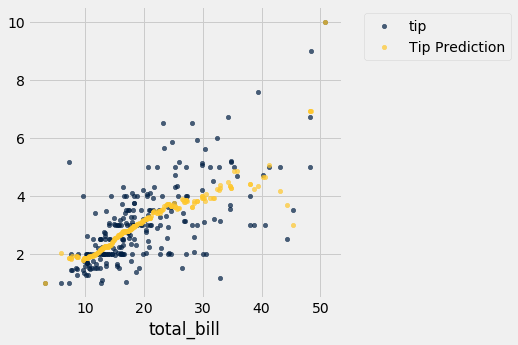

In [55]:
tip_estimates.select(1,0,8).scatter('total_bill')